

```
# This is formatted as code
```

***DeepDetectMalware***

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import read_csv
from numpy import set_printoptions
from keras.utils import np_utils

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,cohen_kappa_score,f1_score,recall_score,precision_score,accuracy_score
import matplotlib.pyplot as plt
import keras
from keras.layers import LSTM, GRU, Embedding, Dense
from keras.activations import sigmoid, softmax, tanh
from keras.optimizers import adam, sgd
from keras.models import Model, Sequential
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, MultiLabelBinarizer
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras.models import load_model
import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense, Dropout, LSTM, Embedding



In [0]:
# data = pd.read_csv('/content/drive/My Drive/Normalizedataset.csv', sep=',')
data = pd.read_csv('/content/drive/My Drive/DynamicLayerDataset.csv')
data.head()

,2Grammed_APICalls_#0,2Grammed_APICalls_#1,2Grammed_APICalls_#2,2Grammed_APICalls_#3,2Grammed_APICalls_#4,2Grammed_APICalls_#5,2Grammed_APICalls_#6,2Grammed_APICalls_#7,2Grammed_APICalls_#8,2Grammed_APICalls_#9,2Grammed_APICalls_#10,2Grammed_APICalls_#11,2Grammed_APICalls_#12,2Grammed_APICalls_#13,2Grammed_APICalls_#14,2Grammed_APICalls_#15,2Grammed_APICalls_#16,2Grammed_APICalls_#17,2Grammed_APICalls_#18,2Grammed_APICalls_#19,2Grammed_APICalls_#20,2Grammed_APICalls_#21,2Grammed_APICalls_#22,2Grammed_APICalls_#23,2Grammed_APICalls_#24,2Grammed_APICalls_#25,2Grammed_APICalls_#26,2Grammed_APICalls_#27,2Grammed_APICalls_#28,2Grammed_APICalls_#29,2Grammed_APICalls_#30,2Grammed_APICalls_#31,2Grammed_APICalls_#32,2Grammed_APICalls_#33,2Grammed_APICalls_#34,2Grammed_APICalls_#35,2Grammed_APICalls_#36,2Grammed_APICalls_#37,2Grammed_APICalls_#38,2Grammed_APICalls_#39,...,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down/Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Header_Length2,Fwd_Avg_Bytes/Bulk,Fwd_Avg_Packets/Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes/Bulk,Bwd_Avg_Packets/Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,<Family>
0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,62,58,15,1,1,2,2,1,43,41,1,1,...,15128,4904,5880,2954041,0,2,0,14,14,6,0,0,22,5421,2119,7301,6602,0,0,0,0,0,0,214,22380,238,208010,983156,56248,48,1156,15852488,281828,16119128,15653804,170240589,19488345,186397186,155416258,koler
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,9,8,8,1,1,1,0,0,1,0,0,0,...,15659,4699,5904,2945087,0,3,0,12,14,6,0,0,21,5135,2032,7153,6593,0,0,0,0,0,0,222,23368,264,237811,915407,67912,52,1003,5625453,438112,6270008,5271904,166045107,8283170,173387076,159763065,koler
2,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,54,15,0,0,0,1,0,40,38,1,1,...,20233,6487,7895,4000639,1,3,0,18,21,9,0,0,29,7114,2816,9754,9397,0,0,0,0,0,0,330,27808,439,458257,1292911,105631,62,1377,17206799,607301,17801215,16789493,246965228,22019770,263938727,230197339,koler
3,0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,58,16,0,0,0,1,0,43,41,1,1,...,20357,6469,7852,3875751,1,3,0,19,20,8,0,0,31,7162,3272,9396,9411,0,0,0,0,0,0,316,32993,410,403554,1331497,102823,68,1530,20024831,540635,20464751,19626959,218034819,31463640,242915705,194688432,koler
4,2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,57,16,0,0,0,1,0,43,40,1,1,...,18209,6052,7087,3528936,1,4,0,17,20,8,0,0,28,6709,2773,8724,8161,0,0,0,0,0,0,279,27579,344,334440,1212973,94374,59,1373,17770612,334061,18098131,17539051,200495551,20186565,218041946,185179596,koler


In [0]:
np.unique(data['<Family>'])

array(['AndroidDefender', 'AvForAndroid', 'FakeTaoBao', 'RansomBO',
       'android.spy.277', 'avpass', 'beanbot', 'biige', 'charger',
       'dowgin', 'ewind', 'fakeapp', 'fakeav', 'fakeinst', 'fakejoboffer',
       'fakemart', 'feiwo', 'gooligan', 'jifake', 'jisut', 'kemoge',
       'koler', 'lockerpin', 'mazarbot', 'mobidash', 'nandrobox',
       'penetho', 'plankton', 'pletor', 'porndroid', 'selfmite',
       'shuanet', 'simplocker', 'smssniffer', 'svpeng', 'virusshield',
       'wannalocker', 'youmi', 'zsone'], dtype=object)

In [0]:
# data=data.drop(['BinaryType','category'], axis=1)
# data.head()

In [0]:
X=data.iloc[:,:-1] 
Y=data.iloc[:,-1]
cols = X.columns

In [0]:
#for conventaional algotirhms

encoder = LabelEncoder()
encoder.fit(data.iloc[:,-1])
data['family'] = encoder.transform(data.iloc[:,-1])
# print(transformed_label)
# cols = data.columns

In [0]:
#for Deep Learning algotirhms
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = np_utils.to_categorical(encoded_Y)


In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X,columns=cols)
X.head()

,2Grammed_APICalls_#0,2Grammed_APICalls_#1,2Grammed_APICalls_#2,2Grammed_APICalls_#3,2Grammed_APICalls_#4,2Grammed_APICalls_#5,2Grammed_APICalls_#6,2Grammed_APICalls_#7,2Grammed_APICalls_#8,2Grammed_APICalls_#9,2Grammed_APICalls_#10,2Grammed_APICalls_#11,2Grammed_APICalls_#12,2Grammed_APICalls_#13,2Grammed_APICalls_#14,2Grammed_APICalls_#15,2Grammed_APICalls_#16,2Grammed_APICalls_#17,2Grammed_APICalls_#18,2Grammed_APICalls_#19,2Grammed_APICalls_#20,2Grammed_APICalls_#21,2Grammed_APICalls_#22,2Grammed_APICalls_#23,2Grammed_APICalls_#24,2Grammed_APICalls_#25,2Grammed_APICalls_#26,2Grammed_APICalls_#27,2Grammed_APICalls_#28,2Grammed_APICalls_#29,2Grammed_APICalls_#30,2Grammed_APICalls_#31,2Grammed_APICalls_#32,2Grammed_APICalls_#33,2Grammed_APICalls_#34,2Grammed_APICalls_#35,2Grammed_APICalls_#36,2Grammed_APICalls_#37,2Grammed_APICalls_#38,2Grammed_APICalls_#39,...,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down/Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Header_Length2,Fwd_Avg_Bytes/Bulk,Fwd_Avg_Packets/Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes/Bulk,Bwd_Avg_Packets/Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,0.000000,0.007254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.001779,0.007676,0.865672,0.789474,0.2,0.25,0.038462,0.000264,0.018519,0.159851,0.872340,0.000095,0.007937,...,0.279838,0.266707,0.340581,0.281434,0.275558,0.0,0.4,0.0,0.333333,0.304348,0.352941,0.0,0.0,0.379310,0.337380,0.238729,0.359001,0.682830,0.0,0.0,0.0,0.0,0.0,0.0,0.168504,0.093452,0.058405,0.036632,0.339724,0.211574,0.212389,0.891074,0.686746,0.051702,0.677004,0.697410,0.426699,0.434780,0.427793,0.420998
1,0.004988,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001779,0.001114,0.119403,0.421053,0.2,0.25,0.019231,0.000000,0.000000,0.003717,0.000000,0.000000,0.000000,...,0.215105,0.276069,0.326341,0.282583,0.274722,0.0,0.6,0.0,0.285714,0.304348,0.352941,0.0,0.0,0.362069,0.319574,0.228922,0.351723,0.682830,0.0,0.0,0.0,0.0,0.0,0.0,0.174803,0.097579,0.064785,0.041880,0.316314,0.255448,0.230088,0.891070,0.241162,0.089969,0.258969,0.234519,0.416125,0.182628,0.397765,0.432835
2,0.000000,0.006908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007057,0.805970,0.789474,0.0,0.00,0.000000,0.000132,0.000000,0.148699,0.808511,0.000095,0.007937,...,0.291976,0.356720,0.450542,0.377878,0.373187,0.5,0.6,0.0,0.428571,0.456522,0.529412,0.0,0.0,0.500000,0.442784,0.317290,0.479618,0.682832,0.0,0.0,0.0,0.0,0.0,0.0,0.259843,0.116126,0.107730,0.080703,0.446758,0.397326,0.274336,0.891080,0.745753,0.131395,0.748398,0.748046,0.620064,0.491745,0.606765,0.624635
3,0.000000,0.007427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007552,0.865672,0.842105,0.0,0.00,0.000000,0.000132,0.000000,0.159851,0.872340,0.000095,0.007937,...,0.348618,0.358906,0.449291,0.375820,0.361537,0.5,0.6,0.0,0.452381,0.434783,0.470588,0.0,0.0,0.534483,0.445773,0.368688,0.462015,0.682832,0.0,0.0,0.0,0.0,0.0,0.0,0.248819,0.137784,0.100613,0.071069,0.460092,0.386763,0.300885,0.891085,0.868532,0.115072,0.861449,0.874558,0.547152,0.704262,0.558242,0.527941
4,0.004988,0.007427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.008667,0.850746,0.842105,0.0,0.00,0.000000,0.000132,0.000000,0.159851,0.851064,0.000095,0.007937,...,0.340526,0.321032,0.42032

In [0]:
print (np.unique(Y))


[0. 1.]


In [0]:
# #Using Pearson Correlation for feature selection
# plt.figure(figsize=(12,10))
# cor = data.corr()
# sns.heatmap(cor, cmap=plt.cm.Reds)
# plt.show()

In [0]:
# #Correlation with output variable
# cor_target = abs(cor["class"])
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.4]
# relevant_features

In [0]:
# # feature extraction
# test = SelectKBest(score_func=f_classif, k=10)
# fit = test.fit(X, Y)
# # summarize scores
# set_printoptions(precision=3)
# print(fit.scores_)
# features = fit.transform(X)
# # summarize selected features
# print(features[0:5,:])

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, random_state=1000)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(244, 918)
(244, 39)
(61, 918)
(61, 39)


In [0]:
np.unique(Y)

array([0., 1.], dtype=float32)

**Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# predictions = tree.predict_proba(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("F1-Score:",metrics.f1_score(Y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(Y_test, y_pred,average='weighted'))
print("Precision:",metrics.precision_score(Y_test, y_pred,average='weighted'))
# print ("Roc Curve",metrics.roc_auc_score(Y_test, predict_proba[:,1]))


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
                 precision    recall  f1-score   support

AndroidDefender       1.00      1.00      1.00         1
   AvForAndroid       0.25      0.50      0.33         2
     FakeTaoBao       0.00      0.00      0.00         3
       RansomBO       1.00      1.00      1.00         2
android.spy.277       0.00      0.00      0.00         2
         avpass       1.00      0.25      0.40         4
        beanbot       0.75      1.00      0.86         3
          biige       0.00      0.00      0.00         1
          ewind       1.00      0.75      0.86         4
        fakeapp       0.00      0.00      0.00         1
         fakeav       1.00      0.67      0.80         3
       fakeinst       0.00      0.00      0.00         1
   fakejoboffer       1.00      1.00      1.00         2
       fakemart       1.00      1.00      1.00         4
          feiwo       0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricW

**Naive Bayes**

In [0]:
clf = GaussianNB()
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# predictions = tree.predict_proba(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("F1-Score:",metrics.f1_score(Y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(Y_test, y_pred,average='weighted'))
print("Precision:",metrics.precision_score(Y_test, y_pred,average='weighted'))
# print ("Roc Curve",metrics.roc_auc_score(Y_test, predict_proba[:,1]))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
                 precision    recall  f1-score   support

AndroidDefender       0.17      1.00      0.29         1
   AvForAndroid       0.00      0.00      0.00         2
     FakeTaoBao       1.00      1.00      1.00         3
       RansomBO       1.00      1.00      1.00         2
android.spy.277       1.00      1.00      1.00         2
         avpass       1.00      0.25      0.40         4
        beanbot       1.00      1.00      1.00         3
          biige       0.00      0.00      0.00         1
         dowgin       0.00      0.00      0.00         0
          ewind       1.00      0.75      0.86         4
        fakeapp       0.00      0.00      0.00         1
         fakeav       0.67      0.67      0.67         3
       fakeinst       0.00      0.00      0.00         1
   fakejoboffer       1.00      1.00      1.00         2
       fakemart       1.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricW

**SVM**

In [0]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, Y_train)


#Predict the response for test dataset
y_pred = clf.predict(X_test)


# predictions = tree.predict_proba(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("F1-Score:",metrics.f1_score(Y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(Y_test, y_pred,average='weighted'))
print("Precision:",metrics.precision_score(Y_test, y_pred,average='weighted'))
# print ("Roc Curve",metrics.roc_auc_score(Y_test, predict_proba[:,1]))


[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricW

**MLP**

In [0]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, Y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# predictions = tree.predict_proba(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("F1-Score:",metrics.f1_score(Y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(Y_test, y_pred,average='weighted'))
print("Precision:",metrics.precision_score(Y_test, y_pred,average='weighted'))
# print ("Roc Curve",metrics.roc_auc_score(Y_test, predict_proba[:,1]))

[[1 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
                 precision    recall  f1-score   support

AndroidDefender       0.03      1.00      0.05         1
   AvForAndroid       0.00      0.00      0.00         2
     FakeTaoBao       0.00      0.00      0.00         3
       RansomBO       0.33      0.50      0.40         2
android.spy.277       0.00      0.00      0.00         2
         avpass       0.00      0.00      0.00         4
        beanbot       0.00      0.00      0.00         3
          biige       0.00      0.00      0.00         1
        charger       0.00      0.00      0.00         0
          ewind       1.00      0.25      0.40         4
        fakeapp       0.00      0.00      0.00         1
         fakeav       0.00      0.00      0.00         3
       fakeinst       0.00      0.00      0.00         1
   fakejoboffer       0.00      0.00      0.00         2
       fakemart       0.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

**Deep Learning**

In [0]:
model=Sequential()
model.add(Dense(130, input_dim=918, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(39, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history=model.fit(x=X_train,y=Y_train,validation_split=0.20,batch_size=6,epochs=50,verbose=1)

Train on 195 samples, validate on 49 samples
Epoch 1/50
195/195 [==============================] - 3s 14ms/step - loss: 3.6687 - acc: 0.0308 - val_loss: 3.6028 - val_acc: 0.1020
Epoch 2/50
195/195 [==============================] - 0s 742us/step - loss: 3.5738 - acc: 0.0513 - val_loss: 3.4551 - val_acc: 0.1020
Epoch 3/50
195/195 [==============================] - 0s 703us/step - loss: 3.4371 - acc: 0.0667 - val_loss: 3.3504 - val_acc: 0.1020
Epoch 4/50
195/195 [==============================] - 0s 678us/step - loss: 3.3744 - acc: 0.0821 - val_loss: 3.2776 - val_acc: 0.1429
Epoch 5/50
195/195 [==============================] - 0s 719us/step - loss: 3.2853 - acc: 0.1128 - val_loss: 3.1903 - val_acc: 0.1837
Epoch 6/50
195/195 [==============================] - 0s 698us/step - loss: 3.1487 - acc: 0.1692 - val_loss: 3.0652 - val_acc: 0.2245
Epoch 7/50
195/195 [==============================] - 0s 678us/step - loss: 2.9416 - acc: 0.2154 - val_loss: 2.9638 - val_acc: 0.1837
Epoch 8/50
195/195

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


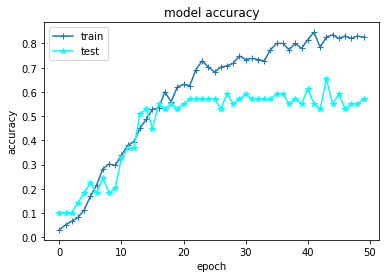

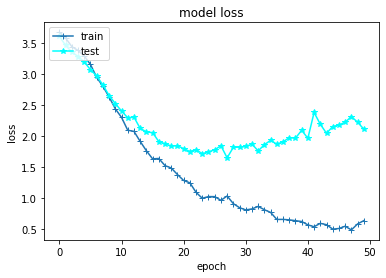

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],marker='+')
plt.plot(history.history['val_acc'],color='cyan',marker='*')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],marker='+')
plt.plot(history.history['val_loss'],color='cyan',marker='*')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# evaluate the model
train_acc = model.evaluate(X_train, Y_train, verbose=0)
test_acc = model.evaluate(X_test, Y_test, verbose=0)

print("Train Accuracy is",train_acc)
print("Test Accuracy is",test_acc)

val_loss, val_acc = model.evaluate(X_test, Y_test)
print("Validation Accuracy is",val_acc)
print("Validation Loss is",val_loss)

Train Accuracy is [0.6314016013848976, 0.8524590183476932]
Test Accuracy is [2.6273591635657136, 0.5245901629573009]
61/61 [==============================] - 0s 97us/step
Validation Accuracy is 0.5245901629573009
Validation Loss is 2.6273591635657136


In [0]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
print(yhat_classes)
print(Y_test)
# reduce to 1d array
# yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]

[14 26 23  0  6  6 31 18 35 17 31 25 18 36  0 12 16 28 12 10  4 26 17 38
  1 25 18  2 10 35 27  3 31 18  2 10 17 18 14 38 27  2  5  4 12 13 26  1
 17 24 26 25 18 33  6 35 18 37 36 17 19]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
import numpy as np
Y_test=np.argmax(Y_test, axis=1)
Y_test[1]

26

In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, yhat_classes,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, yhat_classes,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, yhat_classes,average='weighted')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(Y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_test, yhat_probs.round())
print('ROC AUC: %f' % auc)


Accuracy: 0.524590
Precision: 0.591881
Recall: 0.524590
F1 score: 0.523237
Cohens kappa: 0.507380


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: ignored

In [0]:
ns_probs=[0 for _ in range(len(Y_test))]
# # keep probabilities for the positive outcome only
# lr_probs = yhat_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, yhat_probs)

# summarize scores
print('Abnormal: ROC AUC=%.3f' % (ns_auc))
print('Normal: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, yhat_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=ns_auc)
plt.plot(lr_fpr, lr_tpr, marker='*', label=lr_auc)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()






ValueError: ignored

In [0]:
# confusion matrix
cf_matrix = confusion_matrix(Y_test, yhat_classes)
print(cf_matrix)
df_cm = pd.DataFrame(cf_matrix, 
  index = ['adware', 'ransomware', 'scareware', 'smsMalware'],
  columns = ['adware', 'ransomware', 'scareware', 'smsMalware'])
# sns.heatmap(df_cm, annot=True)

[[10  0  1  1]
 [ 2  7  0  1]
 [ 4  0 20  2]
 [ 0  1  1 16]]


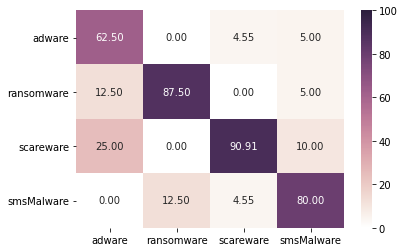

In [0]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# sns.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.2%', cmap='Blues') #for better look divide by 2
sns.heatmap(df_cm/np.sum(df_cm)*100, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)


In [0]:
model.save('adsd.model')

In [0]:
new_model = tf.keras.models.load_model('adsd.model')
predictions = new_model.predict(X_test)
print(predictions)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
[[0.999]
 [0.   ]
 [0.   ]
 ...
 [0.   ]
 [0.   ]
 [1.   ]]


In [0]:
print(np.argmax(predictions[0]))

0
